In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# 데이터 로드
#iris = pd.read_csv('../data/dtm_matrix_tfidf.csv', encoding='cp949')
iris = pd.read_csv('../data/dtm_matrix_origin.csv', encoding='cp949')
columns = iris.columns[1:-1]
print(iris.shape)
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,1:-1],
                                                    iris.iloc[:,-1],
                                                    test_size=0.2,
                                                    random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# 모델 학습
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)


(973, 3653)
(778, 3651) (195, 3651) (778,) (195,)


(0.6182519280205655, 0.6512820512820513)

In [106]:
columns

Index(['10', '12', '31', '365', '42', 'bu', 'bye', 'dalalala', 'ho', 'know',
       ...
       '희망', '희미', '희뿌연', '힘겨운', '힘겨워', '힘겹', '힘내', '힘든', '힘든_새로움_버렸', '힘든데'],
      dtype='object', length=3650)

In [107]:
iris.columns[1:-1]


Index(['10', '12', '31', '365', '42', 'bu', 'bye', 'dalalala', 'ho', 'know',
       ...
       '희망', '희미', '희뿌연', '힘겨운', '힘겨워', '힘겹', '힘내', '힘든', '힘든_새로움_버렸', '힘든데'],
      dtype='object', length=3650)

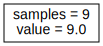

In [108]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz() 를 호출하여 out_file 파라메터의 "tree.dot" 파일을 생성
export_graphviz(model, out_file='tree.dot',
                class_names=['0','1'],
                feature_names=columns,
                filled=True, impurity=False)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

In [109]:
np.argsort(np.round(model.feature_importances_, 3))[::-1]

array([3649, 1225, 1223, ..., 2427, 2426,    0], dtype=int64)

In [110]:
temp = np.sort(np.round(model.feature_importances_, 3))[::-1]
len(temp)

3650

In [111]:
columns

Index(['10', '12', '31', '365', '42', 'bu', 'bye', 'dalalala', 'ho', 'know',
       ...
       '희망', '희미', '희뿌연', '힘겨운', '힘겨워', '힘겹', '힘내', '힘든', '힘든_새로움_버렸', '힘든데'],
      dtype='object', length=3650)

In [112]:
rounded_feature_importance = np.round(model.feature_importances_, 3)
print(rounded_feature_importance)

[0. 0. 0. ... 0. 0. 0.]


In [113]:
len(columns)

3650

In [114]:
len(rounded_feature_importance)

3650

In [115]:
bck = [ (column,importance) for column, importance in zip(rounded_feature_importance, columns) ]
sorted(bck, key = lambda x : -x[0])

[(0.0, '10'),
 (0.0, '12'),
 (0.0, '31'),
 (0.0, '365'),
 (0.0, '42'),
 (0.0, 'bu'),
 (0.0, 'bye'),
 (0.0, 'dalalala'),
 (0.0, 'ho'),
 (0.0, 'know'),
 (0.0, 'lalala'),
 (0.0, 'me'),
 (0.0, 'no'),
 (0.0, 'olny'),
 (0.0, 'ooh'),
 (0.0, 'ooo'),
 (0.0, 'pass'),
 (0.0, 'tv'),
 (0.0, 'wanna'),
 (0.0, 'woah'),
 (0.0, 'woo'),
 (0.0, 'yeah'),
 (0.0, 'you'),
 (0.0, '가게'),
 (0.0, '가까운'),
 (0.0, '가까워'),
 (0.0, '가까워져'),
 (0.0, '가까워졌'),
 (0.0, '가까워질수록'),
 (0.0, '가까이'),
 (0.0, '가깝'),
 (0.0, '가끔'),
 (0.0, '가난'),
 (0.0, '가다듬'),
 (0.0, '가도'),
 (0.0, '가두'),
 (0.0, '가둬'),
 (0.0, '가둬둘'),
 (0.0, '가득'),
 (0.0, '가득히'),
 (0.0, '가라앉'),
 (0.0, '가랑가랑'),
 (0.0, '가려'),
 (0.0, '가려서'),
 (0.0, '가려져'),
 (0.0, '가려진'),
 (0.0, '가로등'),
 (0.0, '가로막'),
 (0.0, '가르'),
 (0.0, '가르쳐'),
 (0.0, '가르쳤'),
 (0.0, '가를'),
 (0.0, '가리'),
 (0.0, '가리워진'),
 (0.0, '가만있'),
 (0.0, '가만히'),
 (0.0, '가벼운'),
 (0.0, '가쁘'),
 (0.0, '가슴'),
 (0.0, '가슴속'),
 (0.0, '가시'),
 (0.0, '가요'),
 (0.0, '가운데'),
 (0.0, '가을'),
 (0.0, '가장'),
 (0.0, '가져가'),
 (0.0, '가져간'),


In [45]:
temp = np.arg(np.round(model.feature_importances_, 3))[::-1]
temp = { column:dt for (dt,column) in zip(temp, columns) if dt > 0}
temp

{'10': 0.31, '12': 0.305, '31': 0.222, '365': 0.101, '42': 0.063}

트리 특성 중요도: [0. 0. 0. ... 0. 0. 0.]


C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\nlp2\lib\site-packages\matplotlib\backends\backen

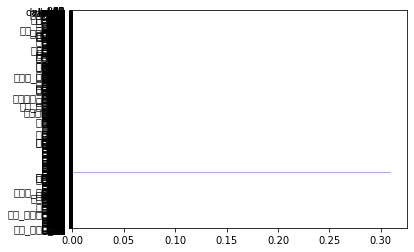

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# feature importance 추출 
print( '트리 특성 중요도:', np.round(model.feature_importances_, 3) )

# feature별 importance 매핑
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_, y=columns)
plt.show()